## Introduction


### Importing Necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Importing the Train & Test Data

In [ ]:
## Load train data
train = pd.read_csv('/content/drive/MyDrive/Projects/Machine Learning/BigMart Sales Predictions/train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Load test data
test = pd.read_csv("/content/drive/MyDrive/Projects/Machine Learning/BigMart Sales Predictions/test.csv")
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
# Checking shape of train & test data

print("Train data shape: ", train.shape)
print("Test data shape: ", test.shape)

Train data shape:  (8523, 12)
Test data shape:  (5681, 11)


Train data has 8523 rows and 12 columns and Test data has 5681 rows and 11 colums. i.e. Labels are missing in test.

So we'll explore train data now, and train the model, Then we'll come back to Test data

In [ ]:
# Describe data

train.describe() 

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
# Check columns info

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
## Check null values

train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Columns names

train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
# Checking unique values in each attribute/columns

for cols in train.columns:
  print(f"\n{cols} : \n{train[cols].value_counts()} \n")


Item_Identifier : 
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64 


Item_Weight : 
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64 


Item_Fat_Content : 
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 


Item_Visibility : 
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64 


Item_Type : 
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking G

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Now that we have a look at our data we can see..

1. Item_Weight, Item_Visibility, Item_MRP , Item_Outlet_Sales has `continuous data`
2. `Item_Weight` has some Null value which we'll impute later
3. Remaining column have `decrete data` 
4. `Outlet_Size` has some Null value which we'll impute later
5. `Item_Fat_Content` has some repeated value which we'll look at in data cleansing process


### Data Cleansing

The Item_Fat_Content column has some repeated value which are same 

like (`Low Fat`,`LF`,`low fat`) represent same value

also (`Regular`,`reg`) represent same value


so we'll change (`low fat` and `LF`) to `Low Fat` 

and `reg` to `Regular`

In [ ]:
# Checking value counts in Item_Fat_Content
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Making a dict to change values
Item_Fat_Content_dict = {'LF' : 'Low Fat',
                         'low fat' : 'Low Fat',
                         'Low Fat' : 'Low Fat',
                         'reg' : 'Regular',
                         'Regular' : 'Regular'}

Item_Fat_Content_dict
                         

{'LF': 'Low Fat',
 'low fat': 'Low Fat',
 'Low Fat': 'Low Fat',
 'reg': 'Regular',
 'Regular': 'Regular'}

In [ ]:
# Changing values 
train['Item_Fat_Content'] = train['Item_Fat_Content'].map(Item_Fat_Content_dict)

In [ ]:
# Checking value counts in Item_Fat_Content after change
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Missing Value Imputation

Now we've to put some values in the columns which have missing values

We've missing values in `Item_Weight` which has `Numerical Data` 

We've missing values in `Outlet_Size` which has `Categorical Data` 



In [ ]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Numerical Imputation
For `Outlet_Size` which has `Categorical Data` 

we'll check the `mean`, `mode` , `group_mean`, `group_median` values and compare it with original values to check which is imputation comes close to original values.

#### Mean Imputation

In [ ]:
# Mean of column Item_Weight
print(f"Mean = {train['Item_Weight'].mean()}")

Mean = 12.857645184135976


In [ ]:
# Putting mean value in missing vaues
train['Item_Weight_Mean'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [ ]:
# Checking missing value

train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Mean                0
dtype: int64

#### Median Imputation

In [ ]:
# Checking median of column Item_Weight

print(f"Median = {train['Item_Weight'].median()}")

Median = 12.6


In [ ]:
# Putting Median values in missing values

train['Item_Weight_Median'] = train['Item_Weight'].fillna(train['Item_Weight'].median())

In [ ]:
# Checking missing value

train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Mean                0
Item_Weight_Median              0
dtype: int64

#### Group Mean Imputation

Now we'll group by some attributes and fine their mean and if there is any missing value in that group we'll put that mean value there.

In [ ]:
# creating and empty dict
weight_dict_mean = {}

# grouping by 'Item_Type','Item_Fat_Content'
for group, df in train.groupby(['Item_Type','Item_Fat_Content']):
  
  # Checking if Item_Weight column has any missing values the group
  if df['Item_Weight'].isna().sum() != 0 :

    # Printing our findings
    print(f"{group} : (Missing Values = {df['Item_Weight'].isna().sum()}) : (Total Values =  {df['Item_Weight'].shape[0]}) ")
    
    # Adding Group and their mean values to weight dict
    weight_dict_mean[group] = df['Item_Weight'].mean()

    # Print mean value of that group
    print(f"Mean Value : {df['Item_Weight'].mean()} \n")


('Baking Goods', 'Low Fat') : (Missing Values = 67) : (Total Values =  329) 
Mean Value : 12.552996183206108 

('Baking Goods', 'Regular') : (Missing Values = 45) : (Total Values =  319) 
Mean Value : 12.013302919708028 

('Breads', 'Low Fat') : (Missing Values = 27) : (Total Values =  140) 
Mean Value : 12.429911504424778 

('Breads', 'Regular') : (Missing Values = 20) : (Total Values =  111) 
Mean Value : 10.002142857142857 

('Breakfast', 'Low Fat') : (Missing Values = 7) : (Total Values =  41) 
Mean Value : 11.849411764705884 

('Breakfast', 'Regular') : (Missing Values = 14) : (Total Values =  69) 
Mean Value : 13.33618181818182 

('Canned', 'Low Fat') : (Missing Values = 55) : (Total Values =  341) 
Mean Value : 11.86465034965035 

('Canned', 'Regular') : (Missing Values = 55) : (Total Values =  308) 
Mean Value : 12.804288537549407 

('Dairy', 'Low Fat') : (Missing Values = 64) : (Total Values =  418) 
Mean Value : 13.391497175141243 

('Dairy', 'Regular') : (Missing Values = 52

In [ ]:
# Check weight mean
weight_dict_mean

{('Baking Goods', 'Low Fat'): 12.552996183206108,
 ('Baking Goods', 'Regular'): 12.013302919708028,
 ('Breads', 'Low Fat'): 12.429911504424778,
 ('Breads', 'Regular'): 10.002142857142857,
 ('Breakfast', 'Low Fat'): 11.849411764705884,
 ('Breakfast', 'Regular'): 13.33618181818182,
 ('Canned', 'Low Fat'): 11.86465034965035,
 ('Canned', 'Regular'): 12.804288537549407,
 ('Dairy', 'Low Fat'): 13.391497175141243,
 ('Dairy', 'Regular'): 13.483797169811321,
 ('Frozen Foods', 'Low Fat'): 12.580333333333334,
 ('Frozen Foods', 'Regular'): 13.180539358600583,
 ('Fruits and Vegetables', 'Low Fat'): 12.75704633204633,
 ('Fruits and Vegetables', 'Regular'): 13.708363273453093,
 ('Hard Drinks', 'Low Fat'): 11.400327868852457,
 ('Health and Hygiene', 'Low Fat'): 13.14231395348837,
 ('Household', 'Low Fat'): 13.384736495388669,
 ('Meat', 'Low Fat'): 13.565643939393938,
 ('Meat', 'Regular'): 12.335512195121952,
 ('Others', 'Low Fat'): 13.853284671532847,
 ('Seafood', 'Low Fat'): 13.80534482758621,
 ('Sea

In [ ]:
## Putting this mean values by group in Missing values of Item_Weight

# Creating new attribute to impute missing data
train['Item_Weight_GP_Mean'] = train['Item_Weight']

# Checking missing value

train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Mean                0
Item_Weight_Median              0
Item_Weight_GP_Mean          1463
dtype: int64

In [ ]:
# Looping through weight_dict_mean
for group, weight in weight_dict_mean.items():

  # filling  missing values
  train.loc[(train['Item_Type'] == group[0]) & # values in Item_Type and Item_Type in group is same
            (train['Item_Fat_Content'] == group[1]) & #values in Item_Fat_Content and Item_Fat_Content in group is same
            (train['Item_Weight'].isna()), 
            'Item_Weight_GP_Mean'] = weight # put Item_Weight_GP_Mean value of group mean weight

In [ ]:
# Checking missing value

train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Mean                0
Item_Weight_Median              0
Item_Weight_GP_Mean             0
dtype: int64

#### Group Median Imputation

Now we'll group by some attributes and fine their median and if there is any missing value in that group we'll put that median value there.

In [ ]:
# creating and empty dict
weight_dict_median = {}

# grouping by 'Item_Type','Item_Fat_Content'
for group, df in train.groupby(['Item_Type','Item_Fat_Content']):
  
  # Checking if Item_Weight column has any missing values the group
  if df['Item_Weight'].isna().sum() != 0 :

    # Printing our findings
    print(f"{group} : (Missing Values = {df['Item_Weight'].isna().sum()}) : (Total Values =  {df['Item_Weight'].shape[0]}) ")
    
    # Adding Group and their mean values to weight dict
    weight_dict_median[group] = df['Item_Weight'].median()

    # Print mean value of that group
    print(f"Median Value : {df['Item_Weight'].median()} \n")

('Baking Goods', 'Low Fat') : (Missing Values = 67) : (Total Values =  329) 
Median Value : 12.3 

('Baking Goods', 'Regular') : (Missing Values = 45) : (Total Values =  319) 
Median Value : 10.65 

('Breads', 'Low Fat') : (Missing Values = 27) : (Total Values =  140) 
Median Value : 12.6 

('Breads', 'Regular') : (Missing Values = 20) : (Total Values =  111) 
Median Value : 8.6 

('Breakfast', 'Low Fat') : (Missing Values = 7) : (Total Values =  41) 
Median Value : 8.895 

('Breakfast', 'Regular') : (Missing Values = 14) : (Total Values =  69) 
Median Value : 11.6 

('Canned', 'Low Fat') : (Missing Values = 55) : (Total Values =  341) 
Median Value : 11.1 

('Canned', 'Regular') : (Missing Values = 55) : (Total Values =  308) 
Median Value : 13.35 

('Dairy', 'Low Fat') : (Missing Values = 64) : (Total Values =  418) 
Median Value : 13.35 

('Dairy', 'Regular') : (Missing Values = 52) : (Total Values =  264) 
Median Value : 12.7 

('Frozen Foods', 'Low Fat') : (Missing Values = 75) : 

In [ ]:
# Check weight mean

weight_dict_median

{('Baking Goods', 'Low Fat'): 12.3,
 ('Baking Goods', 'Regular'): 10.65,
 ('Breads', 'Low Fat'): 12.6,
 ('Breads', 'Regular'): 8.6,
 ('Breakfast', 'Low Fat'): 8.895,
 ('Breakfast', 'Regular'): 11.6,
 ('Canned', 'Low Fat'): 11.1,
 ('Canned', 'Regular'): 13.35,
 ('Dairy', 'Low Fat'): 13.35,
 ('Dairy', 'Regular'): 12.7,
 ('Frozen Foods', 'Low Fat'): 12.85,
 ('Frozen Foods', 'Regular'): 13.1,
 ('Fruits and Vegetables', 'Low Fat'): 12.5,
 ('Fruits and Vegetables', 'Regular'): 13.8,
 ('Hard Drinks', 'Low Fat'): 10.1,
 ('Health and Hygiene', 'Low Fat'): 12.15,
 ('Household', 'Low Fat'): 13.15,
 ('Meat', 'Low Fat'): 12.65,
 ('Meat', 'Regular'): 12.0,
 ('Others', 'Low Fat'): 14.5,
 ('Seafood', 'Low Fat'): 12.6,
 ('Seafood', 'Regular'): 7.42,
 ('Snack Foods', 'Low Fat'): 14.1,
 ('Snack Foods', 'Regular'): 11.6,
 ('Soft Drinks', 'Low Fat'): 11.8,
 ('Soft Drinks', 'Regular'): 8.85,
 ('Starchy Foods', 'Low Fat'): 12.85,
 ('Starchy Foods', 'Regular'): 13.5}

In [ ]:
## Putting this mean values by group in Missing values of Item_Weight

# Creating new attribute to impute missing data
train['Item_Weight_GP_Median'] = train['Item_Weight']

# Checking missing value

train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Mean                0
Item_Weight_Median              0
Item_Weight_GP_Mean             0
Item_Weight_GP_Median        1463
dtype: int64

In [ ]:
# Looping through weight_dict_mean
for group, weight in weight_dict_median.items():

  # filling  missing values
  train.loc[(train['Item_Type'] == group[0]) & # values in Item_Type and Item_Type in group is same
            (train['Item_Fat_Content'] == group[1]) & #values in Item_Fat_Content and Item_Fat_Content in group is same
            (train['Item_Weight'].isna()), 
            'Item_Weight_GP_Median'] = weight # put Item_Weight_GP_Mean value of group mean weight

In [ ]:
# Checking missing value

train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Mean                0
Item_Weight_Median              0
Item_Weight_GP_Mean             0
Item_Weight_GP_Median           0
dtype: int64

#### Comparision of Imputation Method 
Now cheking which Impuation comes close to original values



In [ ]:
# Checking variance of original values
var_original = train['Item_Weight'].var()

var_original

21.561688259836558

In [ ]:
# Checking variance of mean values
var_mean = train['Item_Weight_Mean'].var()

var_mean

17.86012173506058

In [ ]:
# Checking variance of median values
var_median = train['Item_Weight_Median'].var()

var_median

17.869561454073647

In [ ]:
# Checking variance of group mean values
var_gp_mean = train['Item_Weight_GP_Mean'].var()

var_gp_mean

17.95907874993202

In [ ]:
# Checking variance of group median values
var_gp_median = train['Item_Weight_GP_Median'].var()

var_gp_median

18.11617972330169

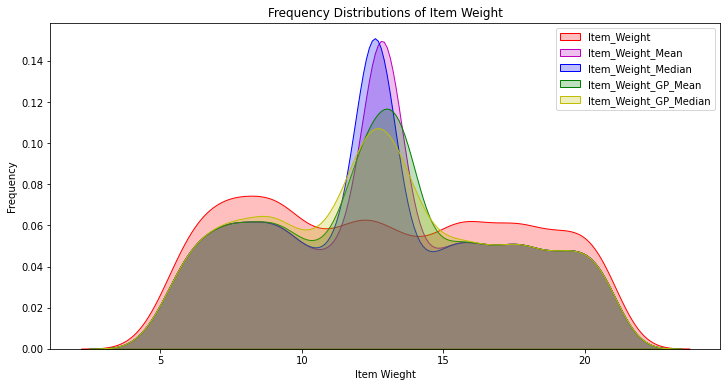

In [ ]:
# Lets plot the values on kdeplot

# Creating figure and axis
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# plotting values
ax = sns.kdeplot(train['Item_Weight'].dropna(), color='r', shade=True, label='Item_Weight')
ax = sns.kdeplot(train['Item_Weight_Mean'], color='m', shade=True, label='Item_Weight_Mean')
ax = sns.kdeplot(train['Item_Weight_Median'], color='b', shade=True, label='Item_Weight_Median')
ax = sns.kdeplot(train['Item_Weight_GP_Mean'], color='g', shade=True, label='Item_Weight_GP_Mean')
ax = sns.kdeplot(train['Item_Weight_GP_Median'], color='y', shade=True, label='Item_Weight_GP_Median')

ax.set_xlabel("Item Wieght")
ax.set_ylabel('Frequency')
ax.set_title("Frequency Distributions of Item Weight")
ax.legend();

 Here We can see `Item_Weight_GP_Median` is showing very close to original items so well use `Item_Weight_GP_Median` for missing values imputation

### Categorical Imputation

We have `Descrete` `Outlet_Size` column where we'll impute missinng values by following methods

we'll check the mode , group_mode compare it with original values to check which is imputation gives use more different data.

#### Mode Imputation

In [ ]:
# checking column
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
# checking column null values
train['Outlet_Size'].isna().sum()

2410

In [ ]:
# Find mode value of column
train['Outlet_Size'].mode()

0    Medium
dtype: object

In [ ]:
# Putting this mode value for missing values
train['Outlet_Size_Mode'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

# Checking null values

train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Mean                0
Item_Weight_Median              0
Item_Weight_GP_Mean             0
Item_Weight_GP_Median           0
Outlet_Size_Mode                0
dtype: int64

#### Group Mode Imputation

We'll Calculate `Mode` of column `Outlet_Size` by grouping columns `Outlet_Type` and fill it in `Missing values` of `Outlet_Size` column 

1.   List item
2.   List item



In [ ]:
# creating empty size dict
size = {}

#
for group, df in train.groupby(['Outlet_Type']):
  
  # Checking if Outlet_Size column has any missing values the group
  if df['Outlet_Size'].isna().sum() != 0:

    # Printing our findings
    print(f"{group} : (Missing Values = {df['Outlet_Size'].isna().sum()}) : (Total_Values = {df['Outlet_Size'].shape[0]}) ")

    # Adding Group and their mean values to weight dict
    size[group] = df['Outlet_Size'].mode()[0]

    # Print mode values of that group
    print(f"Mode Value : {df['Outlet_Size'].mode()} \n")

Grocery Store : (Missing Values = 555) : (Total_Values = 1083) 
Mode Value : 0    Small
dtype: object 

Supermarket Type1 : (Missing Values = 1855) : (Total_Values = 5577) 
Mode Value : 0    Small
dtype: object 



In [ ]:
# Checking size dict
size

{'Grocery Store': 'Small', 'Supermarket Type1': 'Small'}

In [ ]:
# Creating new gp mode column to impute gp mode values

train['Outlet_Size_GP_Mode'] = train['Outlet_Size']

# Checking missing values
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Mean                0
Item_Weight_Median              0
Item_Weight_GP_Mean             0
Item_Weight_GP_Median           0
Outlet_Size_Mode                0
Outlet_Size_GP_Mode          2410
dtype: int64

In [ ]:
# Looping through weight_dict_mean
for k, v in size.items():

  # filling  missing values
  train.loc[(train['Outlet_Type'] == k) & # values in Outlet_Type is equal to k
            (train['Outlet_Size'].isna()), # checking missing value
            'Outlet_Size_GP_Mode'] = v # put Outlet_Size_GP_Mode value of group mean weight

In [ ]:
# Checking missing values
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Mean                0
Item_Weight_Median              0
Item_Weight_GP_Mean             0
Item_Weight_GP_Median           0
Outlet_Size_Mode                0
Outlet_Size_GP_Mode             0
dtype: int64

so we'll use `Outlet_Size_GP_Mode` for our future use

### EDA

We'll only use important columns for `EDA`

In [ ]:
## All columns
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Weight_Mean',
       'Item_Weight_Median', 'Item_Weight_GP_Mean', 'Item_Weight_GP_Median',
       'Outlet_Size_Mode', 'Outlet_Size_GP_Mode'],
      dtype='object')

In [ ]:
## We'll divide our impotant columns

# Numerical columns
num_cols = ['Item_Weight_GP_Median','Item_Visibility','Item_MRP']

# Categorical columns
cat_cols = ['Item_Fat_Content','Item_Type','Outlet_Type','Outlet_Size_GP_Mode','Outlet_Location_Type','Outlet_Establishment_Year']

# Label
target = 'Item_Outlet_Sales'

#### Univariate  Analysis

We'll analise our divided rows... continuoes and categorical 

##### Continuos 

In [ ]:
# Checking num cols data
train[num_cols].describe()


,Item_Weight_GP_Median,Item_Visibility,Item_MRP
count,8523.000000,8523.000000,8523.000000
mean,12.806446,0.066132,140.992782
std,4.256311,0.051598,62.275067
min,4.555000,0.000000,31.290000
25%,9.300000,0.026989,93.826500
50%,12.650000,0.053931,143.012800
75%,16.000000,0.094585,185.643700
max,21.350000,0.328391,266.888400


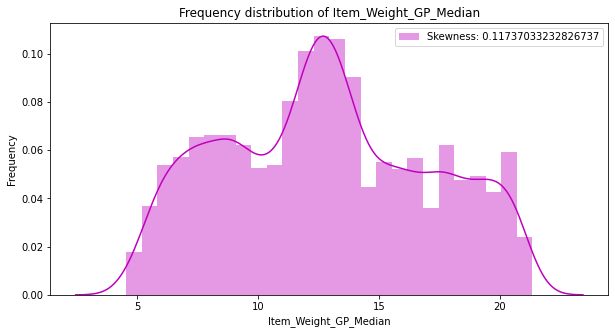

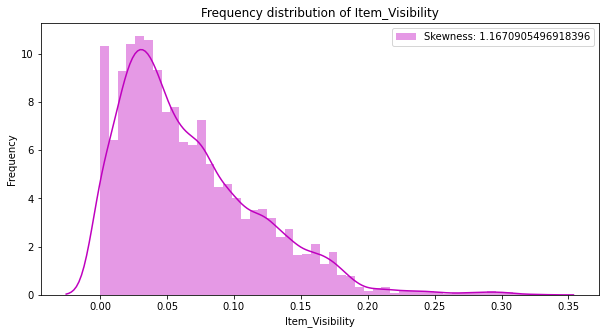

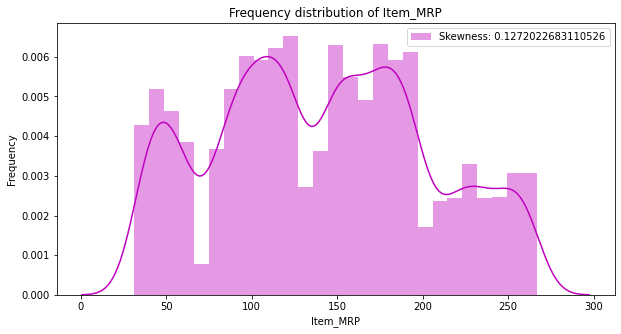

In [ ]:
# Checking distributions of contiuous columns

for cols in num_cols:
  fig = plt.figure(figsize=(10,5))
  ax = fig.add_subplot(111)
  ax = sns.distplot(train[cols], color='m', label=f'Skewness: {train[cols].skew()}')
  ax.set_xlabel(cols)
  ax.set_ylabel('Frequency')
  ax.set_title(f'Frequency distribution of {cols}')
  ax.legend()

##### Categorical

In [ ]:
# Checking counts in each cat cols

for cols in cat_cols:
  print(f'{cols}:\n')
  print(train[cols].value_counts())

Item_Fat_Content:

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Item_Type:

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Outlet_Type:

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64
Outlet_Size_GP_Mode:

Small     4798
Medium    2793
High       932
Name: Outlet_Size_GP_Mode, dtype: int64
Outlet_Location_Type:

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Outlet_Establishment_Yea

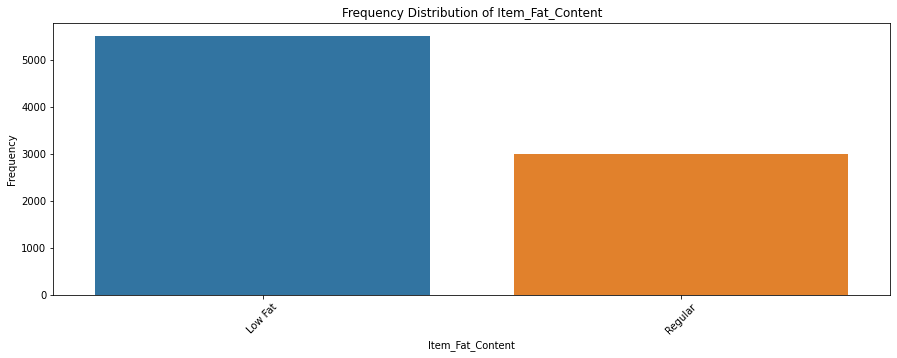

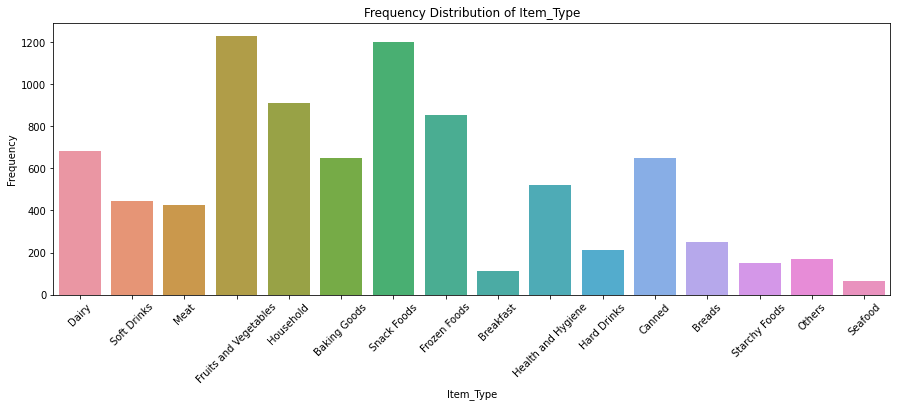

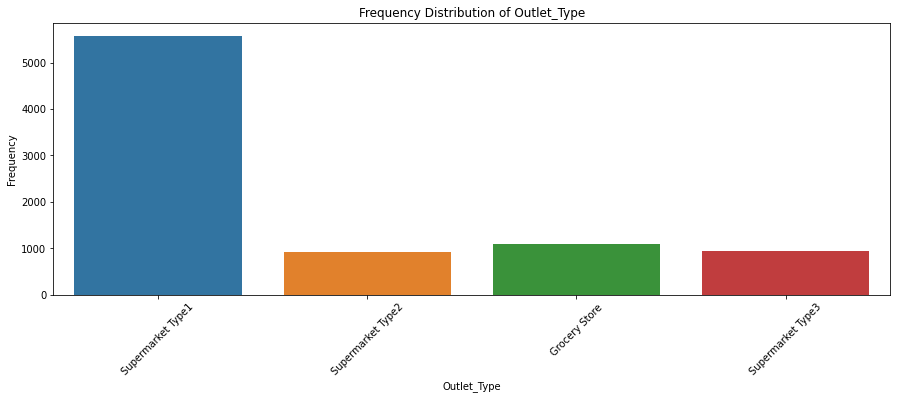

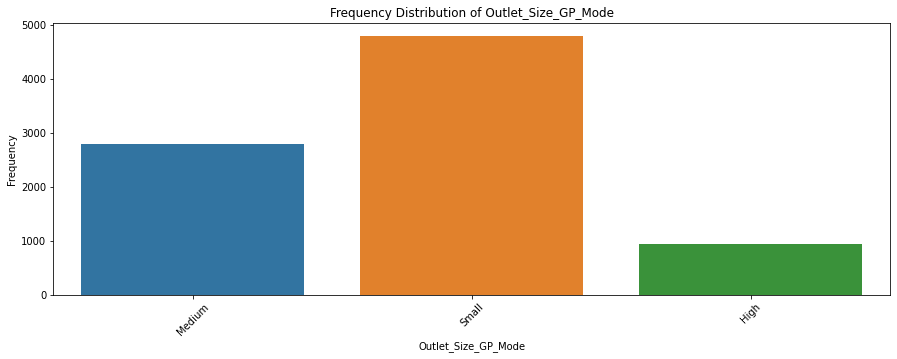

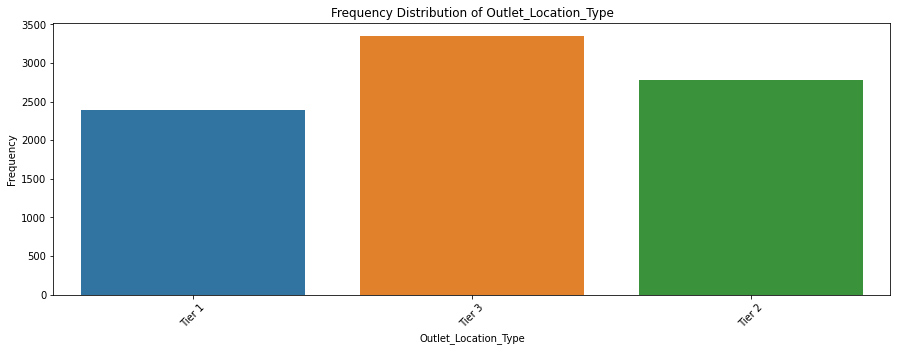

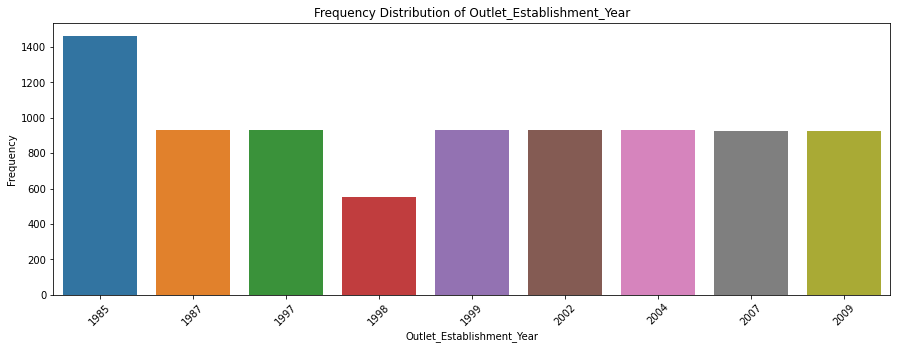

In [ ]:
## Cheking this with visualisation

for cols in cat_cols:
  fig = plt.figure(figsize=(15,5))
  ax = fig.add_subplot(111)
  ax = sns.countplot(x=cols, data=train) 
  ax.set_xlabel(cols)
  plt.xticks(rotation = 45)
  ax.set_ylabel("Frequency")
  ax.set_title(f"Frequency Distribution of {cols}")

### Bivariate
+ cont vs cont -> pairplot
+ cont vs cat -> boxplot
+ cat vs cat -> heatmap

#### cont vs cont -> pairplot

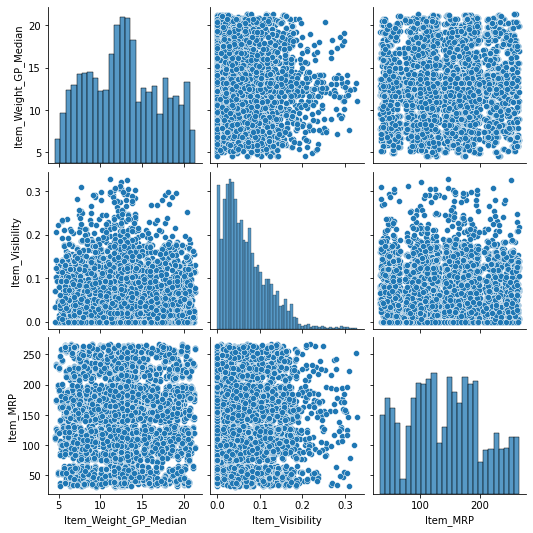

In [ ]:

sns.pairplot(train[num_cols]);

#### cont vs cat -> boxplot

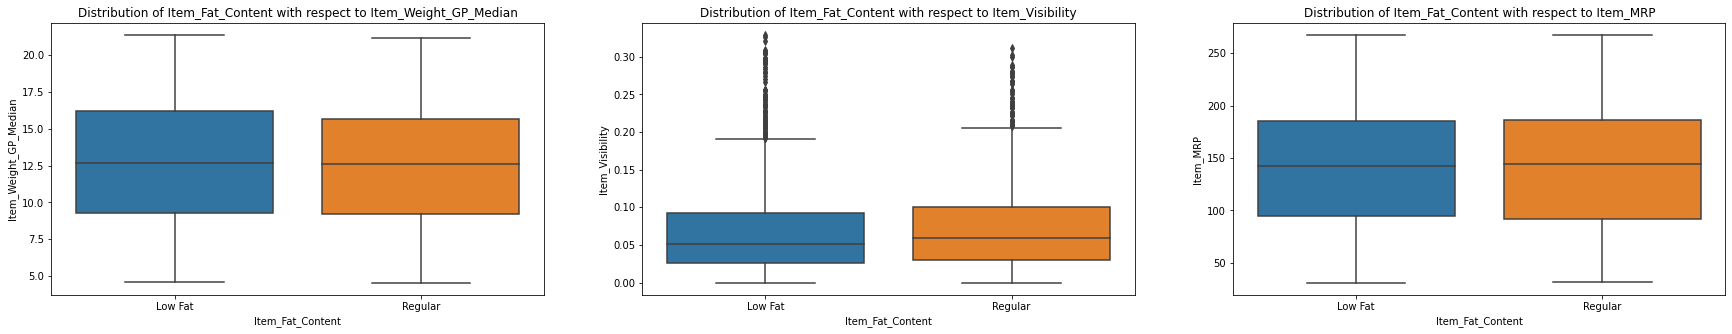

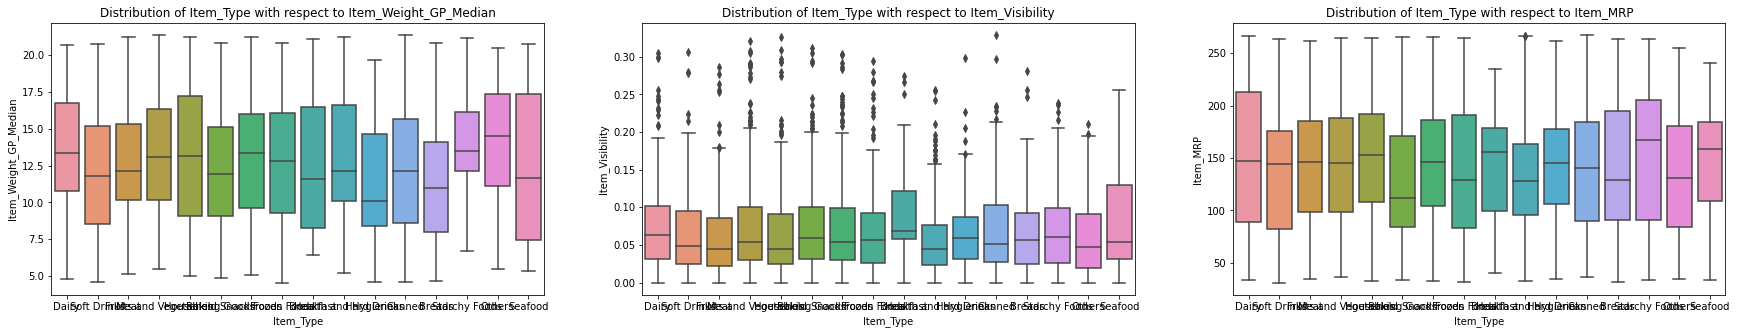

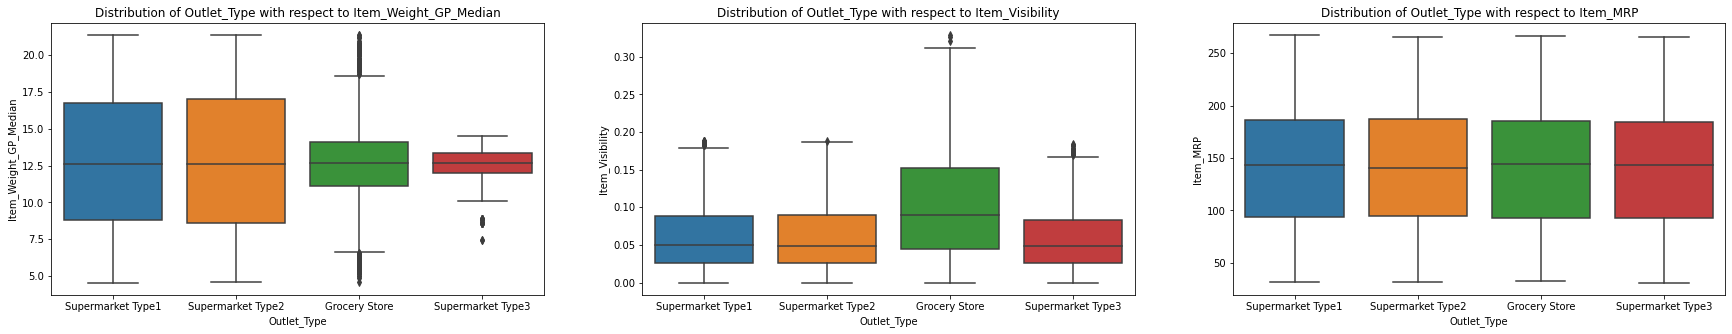

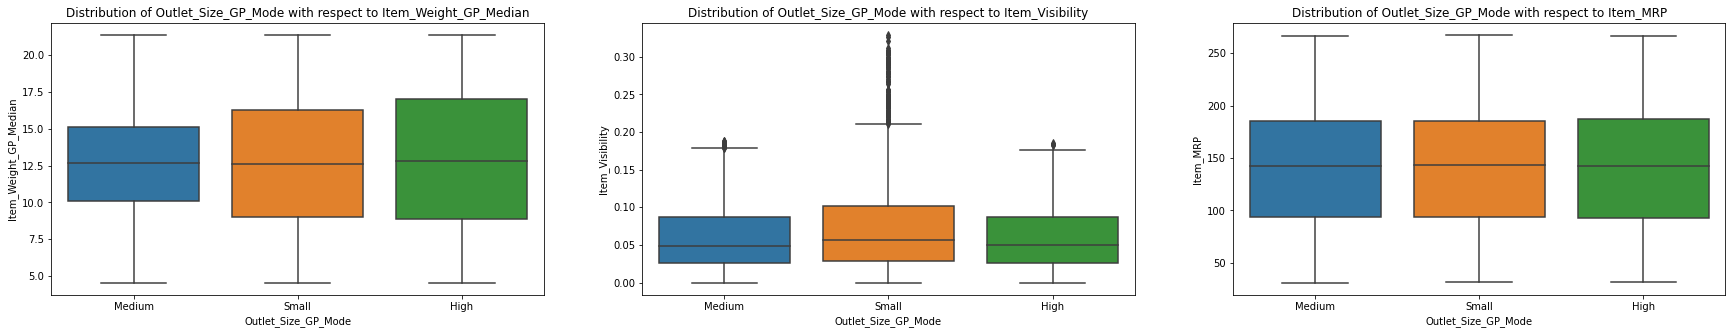

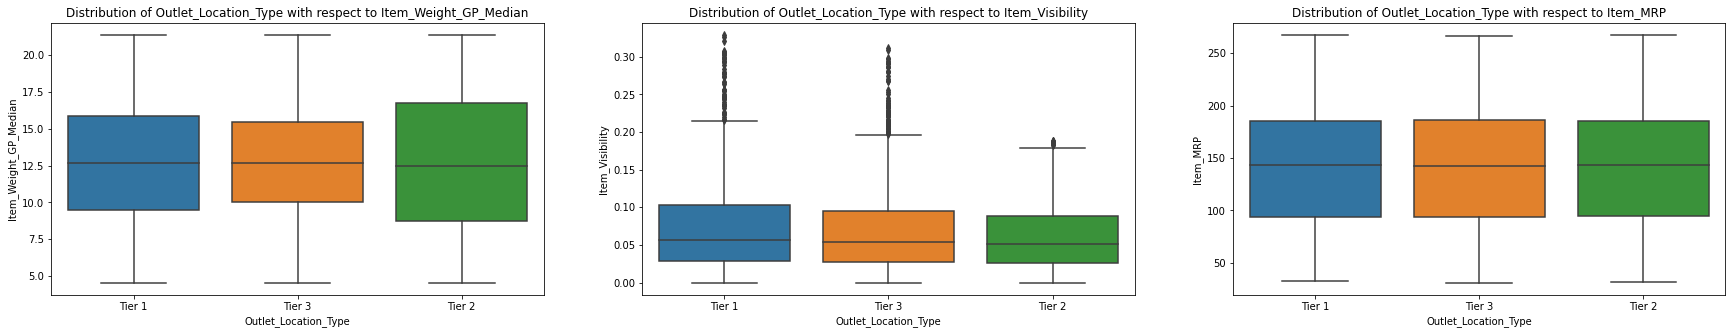

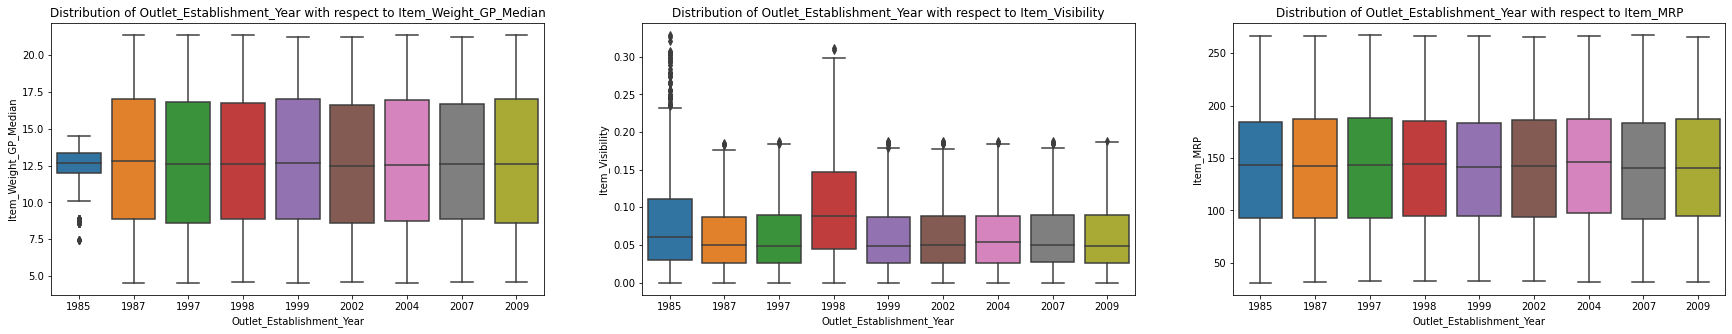

In [ ]:
for cat_col in cat_cols:
    fig = plt.figure(figsize=(30,5))
    j=1
    for num_col in num_cols:
        ax=fig.add_subplot(1,len(num_cols),j)
        sns.boxplot(x=cat_col, y=num_col, data=train, ax=ax)
        ax.set_xlabel(cat_col)
        ax.set_ylabel(num_col)
        ax.set_title(f'Distribution of {cat_col} with respect to {num_col}')
        j+=1

There are some outliers in num_cols which we'll remove later

### Multivariate

We'll check numerical data with target and then categorical data with target

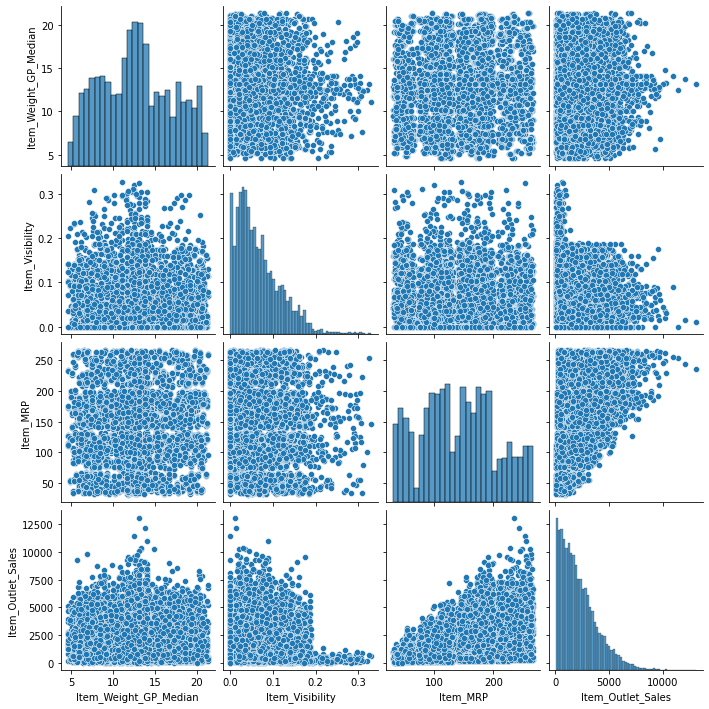

In [ ]:
# numerical data with target 
sns.pairplot(train[num_cols+[target]]);

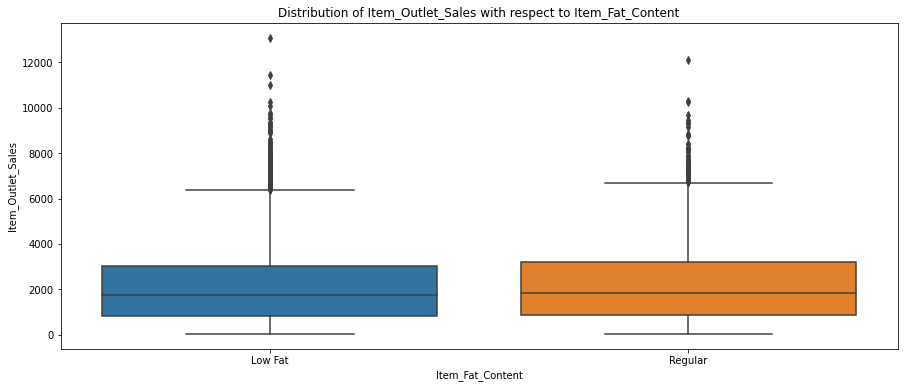

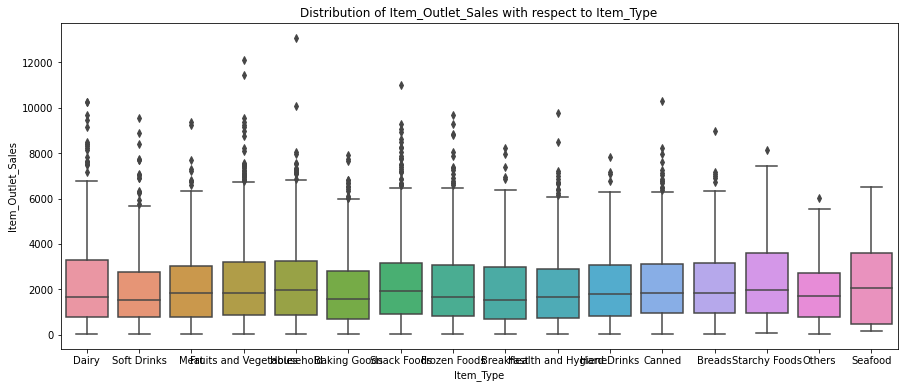

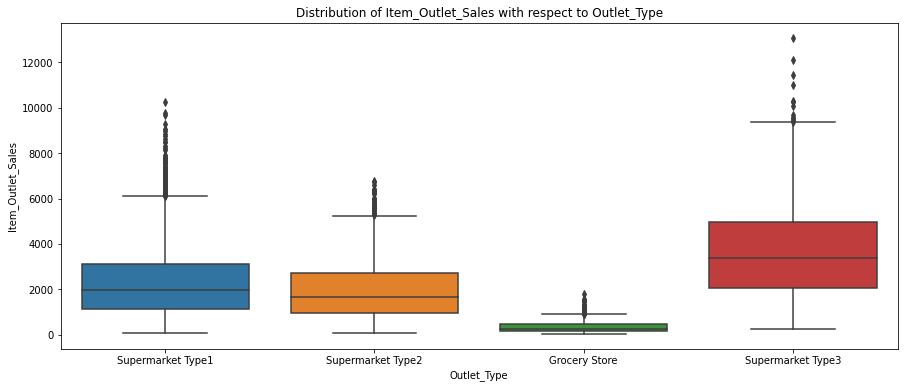

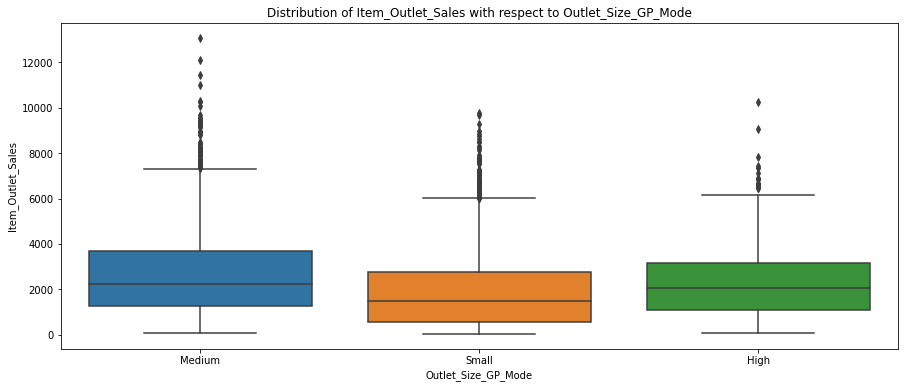

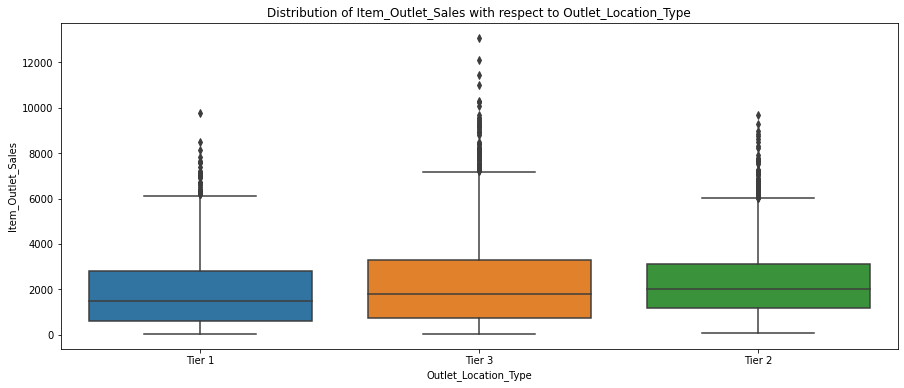

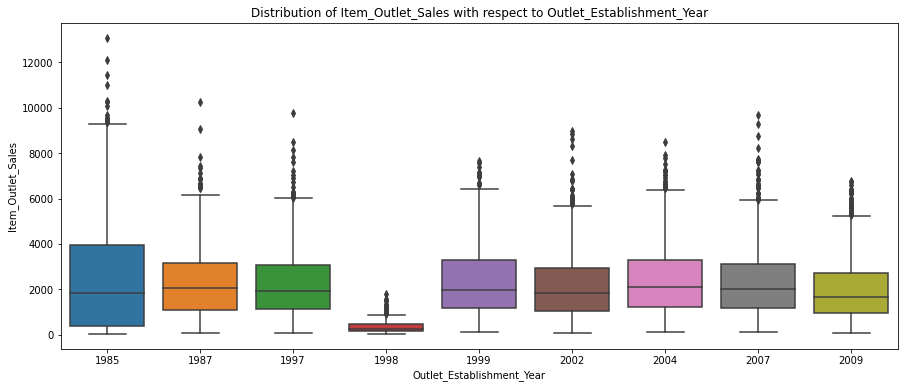

In [ ]:
# categorical data with target
for cat_col in cat_cols:
    fig = plt.figure(figsize=(15,6))
    ax = fig.add_subplot(111)
    
    sns.boxplot(x = cat_col , y = target , data = train , ax=ax)
    
    ax.set_xlabel(cat_col)
    ax.set_ylabel(target)
    
    ax.set_title(f'Distribution of {target} with respect to {cat_col}')

### Outlier Handling

We'll create a function to detect the outlier and which we could use in future

and then remove them from our train data

In [ ]:
# creating function

def handle_outliers(df, var, tol=1.5):
  """
  Inputs:
    df = dataframe
    var = column to check for outliers
    tol = tolerance value, default = 1.5
  """

  var_data = df[var].values
  q25 = np.percentile(var_data,25)
  q75 = np.percentile(var_data,75)

  print(f"Outlier Hanlding for {var}")
  print(f"Quantile 25: {q25}")
  print(f"Quantile 75: {q75}")

  iqr = q75 - q25
  print("IQR:",iqr)

  cut_off = iqr*tol

  lower = q25-cut_off
  upper = q75+cut_off

  print(f"Upper Limit: {upper}")
  print(f"Lower Limit: {lower}")

  outliers = [x for x in var_data if x<lower or x>upper]
  print(f"No of outlier in feature {var} = {len(outliers)} ")

  print(f"{var} Outliers = {outliers} ")

  print('----'*25)

  # Returing index of outliers
  return list(df[ (df[var]>upper) | (df[var]<lower) ].index)

In [ ]:
# Copy train
train_data = train.copy()

In [ ]:
# Checking shape
train.shape, train_data.shape

((8523, 18), (8523, 18))

In [ ]:
# Creating empty outliers
outliers = []

for cols in num_cols:
  outliers.extend(handle_outliers(train_data,cols))

# taking only unique indexes
outlliers = list(set(outliers))

print(f"No of rows which will be dropped: {len(outliers)}")

# Droppping outliers index
train_data = train_data.drop(outliers)


Outlier Hanlding for Item_Weight_GP_Median
Quantile 25: 9.3
Quantile 75: 16.0
IQR: 6.699999999999999
Upper Limit: 26.049999999999997
Lower Limit: -0.7499999999999982
No of outlier in feature Item_Weight_GP_Median = 0 
Item_Weight_GP_Median Outliers = [] 
----------------------------------------------------------------------------------------------------
Outlier Hanlding for Item_Visibility
Quantile 25: 0.0269894775
Quantile 75: 0.0945852925
IQR: 0.067595815
Upper Limit: 0.195979015
Lower Limit: -0.07440424500000001
No of outlier in feature Item_Visibility = 144 
Item_Visibility Outliers = [0.255394896, 0.293417759, 0.278974075, 0.291865402, 0.2047, 0.264124669, 0.228993134, 0.297883712, 0.233039817, 0.210375806, 0.220225608, 0.328390948, 0.205294827, 0.247321039, 0.214139786, 0.227189581, 0.223440258, 0.267352587, 0.25637539, 0.244102315, 0.255348289, 0.224837308, 0.22417463, 0.245542627, 0.236433601, 0.270300331, 0.204713036, 0.32111501, 0.248301532, 0.274405193, 0.207783483, 0.196438

In [ ]:
# Checking shape
train.shape, train_data.shape

((8523, 18), (8379, 18))

### Categorical Encoding
Now we'll put numbers into out categorical columns
+ Gender - Male/Female - Categorical
+ Gender Male - True/False - 0/1 - Numerical

In [ ]:
train_data[num_cols+cat_cols+[target]].head()

,Item_Weight_GP_Median,Item_Visibility,Item_MRP,Item_Fat_Content,Item_Type,Outlet_Type,Outlet_Size_GP_Mode,Outlet_Location_Type,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,Low Fat,Dairy,Supermarket Type1,Medium,Tier 1,1999,3735.1380
1,5.92,0.019278,48.2692,Regular,Soft Drinks,Supermarket Type2,Medium,Tier 3,2009,443.4228
2,17.50,0.016760,141.6180,Low Fat,Meat,Supermarket Type1,Medium,Tier 1,1999,2097.2700
3,19.20,0.000000,182.0950,Regular,Fruits and Vegetables,Grocery Store,Small,Tier 3,1998,732.3800
4,8.93,0.000000,53.8614,Low Fat,Household,Supermarket Type1,High,Tier 3,1987,994.7052


In [ ]:
## ONE HOT ENCODING

train_data_dum = pd.get_dummies(data=train_data[num_cols+cat_cols+[target]], columns=cat_cols, drop_first=True)

In [ ]:
train_data_dum.shape

(8379, 35)

In [ ]:
train_data_dum.head()

,Item_Weight_GP_Median,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
0,9.30,0.016047,249.8092,3735.1380,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,5.92,0.019278,48.2692,443.4228,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,17.50,0.016760,141.6180,2097.2700,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,19.20,0.000000,182.0950,732.3800,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,8.93,0.000000,53.8614,994.7052,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


### Data Split
+ Original - 100 rows - split - 80%train, 20%test

+ Original - Train data - Divided into two

In [ ]:
from sklearn.model_selection import train_test_split


train_data_train, train_data_test = train_test_split(train_data_dum, test_size=0.2, random_state=108)

In [ ]:
# checking shape
train_data_train.shape, train_data_test.shape

((6703, 35), (1676, 35))

In [ ]:
train_data_train.head()

,Item_Weight_GP_Median,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
5160,15.20,0.153593,228.0352,458.0704,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
7298,20.25,0.148303,108.3938,2787.0388,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3482,12.50,0.012216,162.7894,5500.8396,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1718,14.65,0.099286,49.8666,563.9326,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7950,7.76,0.059594,99.6700,1897.5300,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
train_data_test.head()

,Item_Weight_GP_Median,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
3361,12.85,0.126924,87.2224,3494.1184,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
8266,11.65,0.173904,52.3298,269.6490,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
945,13.65,0.021344,58.3588,114.5176,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
928,10.30,0.098465,188.6530,189.7530,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
5347,12.85,0.121702,42.7428,703.0848,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
x_train = train_data_train.drop(target,axis=1)
y_train = train_data_train[target]

In [ ]:
x_test = train_data_test.drop(target, axis=1)
y_test = train_data_test[target]

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Creating object
sc = StandardScaler()

In [ ]:
# Fiting num cols

sc.fit(x_train[num_cols])

StandardScaler()

In [ ]:
x_train[num_cols].head()

,Item_Weight_GP_Median,Item_Visibility,Item_MRP
5160,15.20,0.153593,228.0352
7298,20.25,0.148303,108.3938
3482,12.50,0.012216,162.7894
1718,14.65,0.099286,49.8666
7950,7.76,0.059594,99.6700


In [ ]:
# Checking some methods stored in scaling object

sc.mean_, sc.scale_, sc.var_, sc.var_**0.5  #std 

(array([1.28204968e+01, 6.30851282e-02, 1.41203856e+02]),
 array([4.25850431e+00, 4.61505997e-02, 6.22316788e+01]),
 array([1.81348589e+01, 2.12987785e-03, 3.87278185e+03]),
 array([4.25850431e+00, 4.61505997e-02, 6.22316788e+01]))

In [ ]:
x_train[num_cols] = sc.transform(x_train[num_cols])

In [ ]:
x_train[num_cols].head()

,Item_Weight_GP_Median,Item_Visibility,Item_MRP
5160,0.558765,1.961141,1.395292
7298,1.744627,1.846513,-0.527224
3482,-0.075260,-1.102249,0.346858
1718,0.429612,0.784414,-1.467697
7950,-1.188327,-0.075646,-0.667407


In [ ]:
x_test[num_cols] = sc.transform(x_test[num_cols])

In [ ]:
x_test[num_cols].head()

,Item_Weight_GP_Median,Item_Visibility,Item_MRP
3361,0.006928,1.383275,-0.867427
8266,-0.274861,2.401249,-1.428116
945,0.194787,-0.904461,-1.331236
928,-0.591874,0.766617,0.762460
5347,0.006928,1.270130,-1.582169


### Modelling

In [ ]:
x_train.head()

,Item_Weight_GP_Median,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
5160,0.558765,1.961141,1.395292,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
7298,1.744627,1.846513,-0.527224,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3482,-0.075260,-1.102249,0.346858,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1718,0.429612,0.784414,-1.467697,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7950,-1.188327,-0.075646,-0.667407,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
x_train.shape

(6703, 34)

In [ ]:
x_test.shape

(1676, 34)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor


from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,median_absolute_error

In [ ]:
models_dict = {"Linear Regressio":LinearRegression(),
          "Random Foerst": RandomForestRegressor(),
          "Ridge" : Ridge(),
          "Lasso" : Lasso(),
          #"Tree" : DecisionTreeRegressor(),
          "KNN" : KNeighborsRegressor()}

In [ ]:
models_list = []

mae = []
mse = []
mdae = []
rs = []

In [ ]:
for name,model in models_dict.items():
    
    model.fit(x_train,y_train)
    
    y_pred = model.predict(x_test)
    
    models_list.append(name)
    
    mae.append(mean_absolute_error(y_test,y_pred))
    mse.append(mean_squared_error(y_test,y_pred))
    mdae.append(median_absolute_error(y_test,y_pred))
    rs.append(r2_score(y_test,y_pred))
    
    

In [ ]:
model_dict = {'Model': models_list,
             'Mean_Squared_Error':mse,
             'Mean_Absolute_Error':mae,
             'Median_Absolute_Error':mdae,
             'R^2_Score': rs}

In [ ]:
len(models_list), len(mse), len(mae), len(mdae), len(rs)

(5, 5, 5, 5, 5)

In [ ]:
model_dict

{'Model': ['Linear Regressio', 'Random Foerst', 'Ridge', 'Lasso', 'KNN'],
 'Mean_Squared_Error': [1260196.7696811336,
  1365695.5907683184,
  1260022.0921447172,
  1258846.4408395435,
  1440388.526548941],
 'Mean_Absolute_Error': [845.5454213074241,
  811.0392169116944,
  845.4380153467054,
  844.3556970296364,
  862.8599563723151],
 'Median_Absolute_Error': [670.3132188641224,
  539.1814850000001,
  670.3698612762885,
  665.8169228101874,
  604.94588],
 'R^2_Score': [0.5448919451793051,
  0.5067920512532049,
  0.5449550283070609,
  0.5453796035730175,
  0.47981740925299765]}

In [ ]:
model_df = pd.DataFrame(model_dict)

model_df

,Model,Mean_Squared_Error,Mean_Absolute_Error,Median_Absolute_Error,R^2_Score
0,Linear Regressio,1.260197e+06,845.545421,670.313219,0.544892
1,Random Foerst,1.365696e+06,811.039217,539.181485,0.506792
2,Ridge,1.260022e+06,845.438015,670.369861,0.544955
3,Lasso,1.258846e+06,844.355697,665.816923,0.545380
4,KNN,1.440389e+06,862.859956,604.945880,0.479817


In [ ]:
model_df.sort_values(by=['R^2_Score','Median_Absolute_Error'], ascending=[False, True], inplace=True)

model_df

,Model,Mean_Squared_Error,Mean_Absolute_Error,Median_Absolute_Error,R^2_Score
3,Lasso,1.258846e+06,844.355697,665.816923,0.545380
2,Ridge,1.260022e+06,845.438015,670.369861,0.544955
0,Linear Regressio,1.260197e+06,845.545421,670.313219,0.544892
1,Random Foerst,1.365696e+06,811.039217,539.181485,0.506792
4,KNN,1.440389e+06,862.859956,604.945880,0.479817


#### Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_validate, cross_val_score

In [ ]:
kf = KFold(n_splits=50)

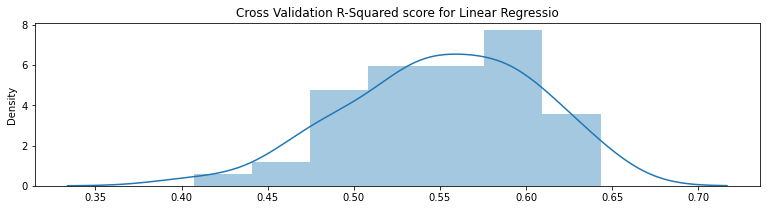

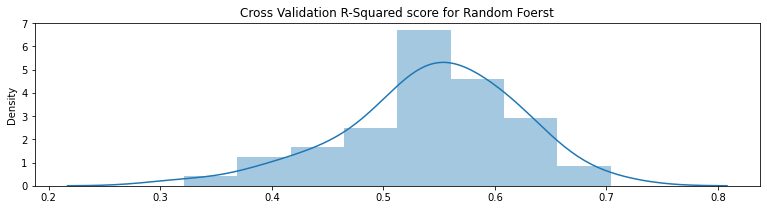

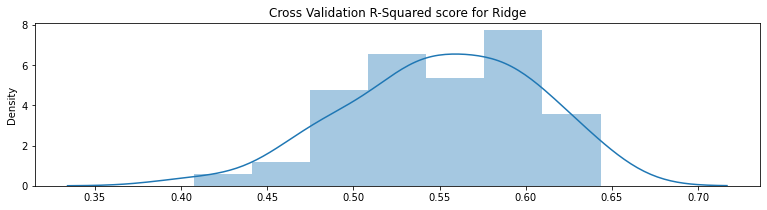

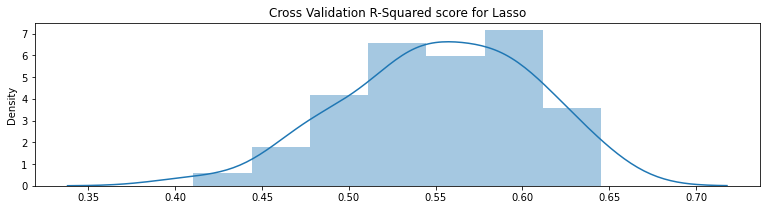

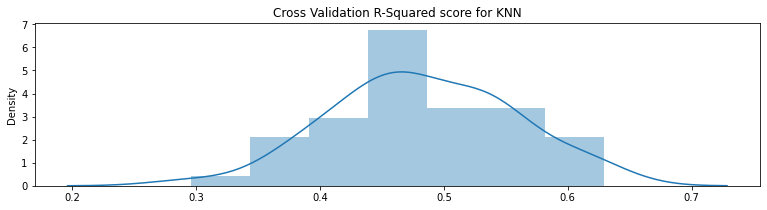

In [ ]:
for name,model in models_dict.items():
    
    
    model.fit(x_train, y_train)
    
    cv_score = cross_val_score(estimator=model, X=x_train, y=y_train,cv=kf, n_jobs=12)
    
    fig = plt.figure(figsize=(13,3))
    ax= fig.add_subplot(111)
    ax = sns.distplot(cv_score)
    ax.set_title(f'Cross Validation R-Squared score for {name}')

so from our observations we can see Lasso is working really well for our model

### Preprocessing Test Data
 Now that we have selected a model to predict test data, It is time to preprocess test data

In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
# Copy
test_data = test.copy()

#### Data Cleansing

In [ ]:
# Checking value counts in Item_Fat_Content
test_data['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Changing values 
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].map(Item_Fat_Content_dict)

In [ ]:
# Checking value counts in Item_Fat_Content after change
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Missing Value Imputation
 We'll do the same steps which we did for train data



##### Numerical

In [ ]:
# creating and empty dict
weight_dict_median = {}

# grouping by 'Item_Type','Item_Fat_Content'
for group, df in test_data.groupby(['Item_Type','Item_Fat_Content']):
  
  # Checking if Item_Weight column has any missing values the group
  if df['Item_Weight'].isna().sum() != 0 :

    # Printing our findings
    print(f"{group} : (Missing Values = {df['Item_Weight'].isna().sum()}) : (Total Values =  {df['Item_Weight'].shape[0]}) ")
    
    # Adding Group and their mean values to weight dict
    weight_dict_median[group] = df['Item_Weight'].median()

    # Print mean value of that group
    print(f"Median Value : {df['Item_Weight'].median()} \n")

('Baking Goods', 'Low Fat') : (Missing Values = 29) : (Total Values =  213) 
Median Value : 12.3 

('Baking Goods', 'Regular') : (Missing Values = 45) : (Total Values =  225) 
Median Value : 10.8 

('Breads', 'Low Fat') : (Missing Values = 13) : (Total Values =  82) 
Median Value : 11.0 

('Breads', 'Regular') : (Missing Values = 13) : (Total Values =  83) 
Median Value : 8.0 

('Breakfast', 'Low Fat') : (Missing Values = 5) : (Total Values =  25) 
Median Value : 12.247499999999999 

('Breakfast', 'Regular') : (Missing Values = 8) : (Total Values =  51) 
Median Value : 11.6 

('Canned', 'Low Fat') : (Missing Values = 40) : (Total Values =  208) 
Median Value : 11.6 

('Canned', 'Regular') : (Missing Values = 36) : (Total Values =  227) 
Median Value : 12.5 

('Dairy', 'Low Fat') : (Missing Values = 55) : (Total Values =  273) 
Median Value : 13.8 

('Dairy', 'Regular') : (Missing Values = 24) : (Total Values =  181) 
Median Value : 11.35 

('Frozen Foods', 'Low Fat') : (Missing Values 

In [ ]:
## Putting this mean values by group in Missing values of Item_Weight

# Creating new attribute to impute missing data
test_data['Item_Weight_GP_Median'] = test_data['Item_Weight']

# Checking missing value

test_data.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Item_Weight_GP_Median         976
dtype: int64

In [ ]:
# Looping through weight_dict_mean
for group, weight in weight_dict_median.items():

  # filling  missing values
  test_data.loc[(test_data['Item_Type'] == group[0]) & # values in Item_Type and Item_Type in group is same
            (test_data['Item_Fat_Content'] == group[1]) & #values in Item_Fat_Content and Item_Fat_Content in group is same
            (test_data['Item_Weight'].isna()), 
            'Item_Weight_GP_Median'] = weight # put Item_Weight_GP_Mean value of group mean weight

In [ ]:
# Checking missing value

test_data.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Item_Weight_GP_Median           0
dtype: int64

##### Categorical

In [ ]:
# creating empty size dict
size = {}

#
for group, df in test_data.groupby(['Outlet_Type']):
  
  # Checking if Outlet_Size column has any missing values the group
  if df['Outlet_Size'].isna().sum() != 0:

    # Printing our findings
    print(f"{group} : (Missing Values = {df['Outlet_Size'].isna().sum()}) : (Total_Values = {df['Outlet_Size'].shape[0]}) ")

    # Adding Group and their mean values to weight dict
    size[group] = df['Outlet_Size'].mode()[0]

    # Print mode values of that group
    print(f"Mode Value : {df['Outlet_Size'].mode()} \n")

Grocery Store : (Missing Values = 370) : (Total_Values = 722) 
Mode Value : 0    Small
dtype: object 

Supermarket Type1 : (Missing Values = 1236) : (Total_Values = 3717) 
Mode Value : 0    Small
dtype: object 



In [ ]:
# Creating new gp mode column to impute gp mode values

test_data['Outlet_Size_GP_Mode'] = test_data['Outlet_Size']

# Checking missing values
test_data.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Item_Weight_GP_Median           0
Outlet_Size_GP_Mode          1606
dtype: int64

In [ ]:
# Looping through weight_dict_mean
for k, v in size.items():

  # filling  missing values
  test_data.loc[(test_data['Outlet_Type'] == k) & # values in Outlet_Type is equal to k
            (test_data['Outlet_Size'].isna()), # checking missing value
            'Outlet_Size_GP_Mode'] = v # put Outlet_Size_GP_Mode value of group mean weight

In [ ]:
# Checking missing values
test_data.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Item_Weight_GP_Median           0
Outlet_Size_GP_Mode             0
dtype: int64

#### Feature Scaling

In [ ]:
test_data[num_cols].head()

,Item_Weight_GP_Median,Item_Visibility,Item_MRP
0,20.750,0.007565,107.8622
1,8.300,0.038428,87.3198
2,14.600,0.099575,241.7538
3,7.315,0.015388,155.0340
4,11.350,0.118599,234.2300


In [ ]:
test_data[num_cols] = sc.transform(test_data[num_cols])

In [ ]:
test_data[num_cols].head()

,Item_Weight_GP_Median,Item_Visibility,Item_MRP
0,1.862039,-1.203024,-0.535767
1,-1.061522,-0.534282,-0.865862
2,0.417870,0.790668,1.615736
3,-1.292824,-1.033502,0.222236
4,-0.345308,1.202892,1.494836


#### categorical encoding

In [ ]:
## ONE HOT ENCODING

x_test = pd.get_dummies(data=test_data[num_cols+cat_cols], columns=cat_cols, drop_first=True)

In [ ]:
x_test.head()

,Item_Weight_GP_Median,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
0,1.862039,-1.203024,-0.535767,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-1.061522,-0.534282,-0.865862,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0.417870,0.790668,1.615736,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,-1.292824,-1.033502,0.222236,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,-0.345308,1.202892,1.494836,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
x_test.shape, x_train.shape

((5681, 34), (6703, 34))

Index(['Item_Weight_GP_Median', 'Item_Visibility', 'Item_MRP',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Outlet_Size_GP_Mode_Medium',
       'Outlet_Size_GP_Mode_Small', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Establishment_Year_1987',
       'Outlet_Establishment_Year_1997', 'Outlet_Establishment_Year_1998',
       'Outlet_Establishment_Year_1999', 'Outlet_Establishment_Year_2002',
       'Outlet_Establishment_Year_2004', 'Outlet_Establishment_Year_2007',
 

In [ ]:
x_train.columns

Index(['Item_Weight_GP_Median', 'Item_Visibility', 'Item_MRP',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Outlet_Size_GP_Mode_Medium',
       'Outlet_Size_GP_Mode_Small', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Establishment_Year_1987',
       'Outlet_Establishment_Year_1997', 'Outlet_Establishment_Year_1998',
       'Outlet_Establishment_Year_1999', 'Outlet_Establishment_Year_2002',
       'Outlet_Establishment_Year_2004', 'Outlet_Establishment_Year_2007',
 

### Modelling

In [ ]:
lasso = Lasso()

In [ ]:
lasso.fit(x_train,y_train)

preds = lasso.predict(x_test)

In [ ]:
preds

array([1825.58159395, 1510.74675495, 1958.8044448 , ..., 1843.36259198,
       3583.91053303, 1260.38020277])

In [ ]:
test['predictions'] = preds

In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,predictions
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1825.581594
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1510.746755
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,1958.804445
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2584.625693
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,5201.424346


In [ ]:
test.to_csv("/content/drive/MyDrive/Projects/Machine Learning/BigMart Sales Predictions/All.csv")

In [ ]:
test[['Item_Identifier','predictions']]

,Item_Identifier,predictions
0,FDW58,1825.581594
1,FDW14,1510.746755
2,NCN55,1958.804445
3,FDQ58,2584.625693
4,FDY38,5201.424346
...,...,...
5676,FDB58,2288.571228
5677,FDD47,2452.655654
5678,NCO17,1843.362592
5679,FDJ26,3583.910533


In [ ]:
to_csv("/content/drive/MyDrive/Projects/Machine Learning/BigMart Sales Predictions/preds.csv")